# Revisão dos artigos publicados


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
%unload_ext google.colab.data_table


The google.colab.data_table extension is not loaded.


In [3]:
path = "/content/drive/MyDrive/ufrn/mestrado/DIM0868 -  TOPICOS AVANCADOS EM SISTEMAS INTEGRADOS E DISTRIBUIDOS II/Revisão dos artigos publicados/scopus.csv"
df = pd.read_csv(path)

## Papers publicados na International Conference on Dependable Systems and Networks Workshops

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            1959 non-null   object 
 1   Author(s) ID       1959 non-null   object 
 2   Title              1959 non-null   object 
 3   Year               1959 non-null   int64  
 4   Source title       1959 non-null   object 
 5   Volume             140 non-null    object 
 6   Issue              0 non-null      float64
 7   Art. No.           1426 non-null   float64
 8   Page start         1740 non-null   object 
 9   Page end           1632 non-null   object 
 10  Page count         34 non-null     float64
 11  Cited by           1585 non-null   float64
 12  DOI                1818 non-null   object 
 13  Link               1959 non-null   object 
 14  Abstract           1959 non-null   object 
 15  Author Keywords    868 non-null    object 
 16  Index Keywords     1813 

## **1ª Fase**

### Aplicando filtro de campos e limpando entradas indesejadas

In [5]:
reg_string = "tolerance|iot|things|dependable|dependability|cyber|sensor|machine to machine|m2m"
search_box = ['Title', 'Index Keywords', 'Author Keywords', 'Abstract']
df['search_box'] = ''

for search in search_box:
  df['search_box'] =  df['search_box'].map(str) + ' ' + df[search].map(str)
df = df[df['Authors'] != '[No author name available]']
# df_aux = df[(df['Authors'] != '[No author name available]') & (df['search_box'].str.contains(reg_string))]
# df_aux.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 1958
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            1921 non-null   object 
 1   Author(s) ID       1921 non-null   object 
 2   Title              1921 non-null   object 
 3   Year               1921 non-null   int64  
 4   Source title       1921 non-null   object 
 5   Volume             136 non-null    object 
 6   Issue              0 non-null      float64
 7   Art. No.           1422 non-null   float64
 8   Page start         1737 non-null   object 
 9   Page end           1630 non-null   object 
 10  Page count         0 non-null      float64
 11  Cited by           1585 non-null   float64
 12  DOI                1815 non-null   object 
 13  Link               1921 non-null   object 
 14  Abstract           1921 non-null   object 
 15  Author Keywords    868 non-null    object 
 16  Index Keywords     1805 

# Sobre a conferencia
##Qualitativos

### Tipo de trabalhos

TIPOS DE DOCUMENTOS PUBLICADOS


Conference Paper    1844
Editorial             77
Name: Document Type, dtype: int64

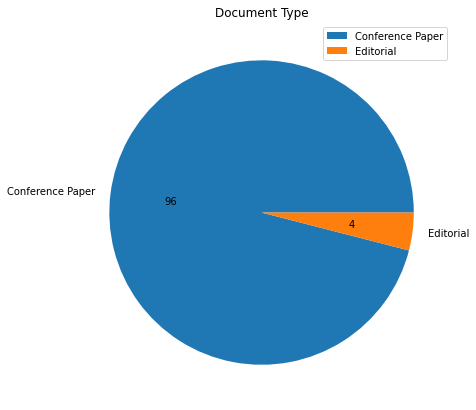

In [6]:
import matplotlib.pyplot as plt
print("TIPOS DE DOCUMENTOS PUBLICADOS")
display(df['Document Type'].value_counts())

pie_chart = df['Document Type'].value_counts().plot(figsize=(7, 7), kind='pie', title='Document Type', legend='left', y="Document Type", autopct="%.0f", ylabel='')



#### Distribuição das Citações, Papers e Autores/Ano

DISTRIBUIÇÃO DAS CITAÇÕES POR ANO
Autores distintos: 4229


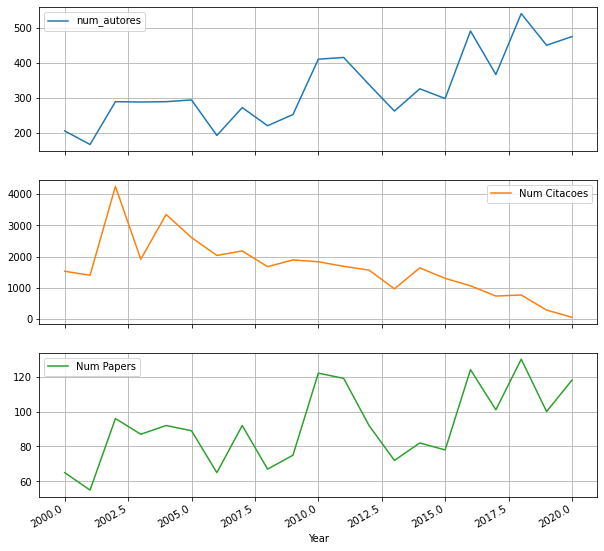

Year            2010.000000
num_autores      326.000000
Num Citacoes    1657.047619
Num Papers        91.476190
ratio             19.445168
ratio2             3.513311
dtype: float64

In [7]:
print("DISTRIBUIÇÃO DAS CITAÇÕES POR ANO")
distribuicao = df.groupby('Year').agg([('Papers','count'), ('Citacoes','sum')])[[('Cited by', 'Citacoes'), ('Authors', 'Papers')]].reset_index()
distribuicao
# by_paper = df.groupby('Year').agg({'Cited by': 'sum'},{'Title': 'count'}).reset_index()
distribuicao.columns = ['Year', 'Num Citacoes', 'Num Papers']
# distribuicao.plot(subplots=True, sharex=True, x='Year', figsize=(10, 10), grid=True)
# plt.show()

autores = df
autores['ids'] = df["Author(s) ID"].str.split(";")
autores['nomes'] = df["Authors"].str.split(",")
keys = autores.explode('ids')['ids']
values = autores.explode('nomes')['nomes']
keys = list(filter(None, keys))
df['num_autores'] = df["Author(s) ID"].str.split(';').map(len)-1
print('Autores distintos:', len(set(keys)) )
test = df.groupby('Year').agg({'num_autores':'sum'}).reset_index()
test = pd.merge(test, distribuicao, on='Year', sort=False)

test.plot(subplots=True, sharex=True, x='Year', figsize=(10, 10), grid=True)
plt.show()
test['ratio'] = test['Num Citacoes'] / test['Num Papers']
test['ratio2'] = test['num_autores'] / test['Num Papers']
test.mean()


# import seaborn as sns

# Your DataFrame here 

# sns.lmplot(x='year',y='value',data=data,fit_reg=True) 

# sns.lmplot(x='Year',y='Num Citacoes',data=test, fit_reg=True) 
#  
# sns.lmplot(x='Year',y='Num Papers',data=test, fit_reg=True) 



# ax1 = sns.set_style(style=None, rc=None )

# fig, ax1 = plt.subplots(figsize=(12,6))
# sns.regplot(x='Year',y='num_autores',data=test, fit_reg=True)
# # sns.lineplot(data = test['num_autores'], marker='o', sort = False, ax=ax1)
# ax2 = ax1.twinx()
# sns.barplot(data = test, x='Year', y='Num Citacoes', alpha=0.5, ax=ax2)



### Tendencias

#### Por palavras-Chave

In [9]:
from collections import Counter

df['Index Keywords'] = df['Index Keywords'].astype(str)
df['Author Keywords'] = df['Author Keywords'].astype(str)
df['terms'] =  df['Author Keywords'].map(str) + "; " + df['Index Keywords'].map(str)

In [10]:
def get_keywords_counted(df):
  keywords = list()
  [keywords.extend(value.split('; ')) for value in df['terms'].unique().tolist() if type(value) != float]
  keywords_dict = dict(Counter(keywords))

  sorted_dict = dict(sorted(keywords_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

  termos = list(sorted_dict.items())
  termos = pd.DataFrame(termos, index = np.arange(len(termos)), columns=['Keyword', df.Year.iloc[0]])
  # termos['Keyword'] = termos['Keyword'].str.lower()
  return termos
  
df['terms'] = df['terms'].str.lower()
grouped = df.groupby("Year")
for k, year in enumerate(grouped.groups.keys()):
  result = get_keywords_counted(grouped.get_group(year))  
  if k == 0:
    dt = result
  else:
    dt = pd.merge(dt, result, on=["Keyword"], how='outer')



dt = dt.fillna(0)
dt['Total'] = dt.sum(axis=1)
dt.drop(dt.index[:1], inplace=True)

display(dt.sort_values('Total', ascending=False))

print("VARIAÇÃO DO TERMO 'FAULT'.")

dt['Num Ocorrencias'] = dt['Total']
display(dt[dt['Keyword'].str.contains('fault')][['Keyword','Num Ocorrencias']].sort_values('Num Ocorrencias', ascending=False))


print("Termos Mais recorrentes em 2020.")
display(dt.sort_values(2020, ascending=False))

,Keyword,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
1,fault tolerant computer systems,39.0,26.0,46.0,41.0,28.0,24.0,12.0,9.0,3.0,7.0,12.0,5.0,2.0,3.0,8.0,4.0,6.0,1.0,4.0,1.0,2.0,283.0
4,network protocols,15.0,8.0,22.0,20.0,24.0,20.0,9.0,14.0,62.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,207.0
968,fault tolerance,0.0,0.0,0.0,2.0,0.0,1.0,0.0,19.0,5.0,4.0,14.0,21.0,21.0,10.0,23.0,16.0,17.0,3.0,18.0,20.0,12.0,206.0
3,algorithms,17.0,16.0,21.0,25.0,23.0,16.0,10.0,18.0,0.0,1.0,4.0,5.0,6.0,2.0,7.0,4.0,1.0,1.0,1.0,1.0,0.0,179.0
8,reliability,11.0,4.0,9.0,13.0,7.0,1.0,0.0,1.0,9.0,1.0,7.0,7.0,12.0,11.0,8.0,9.0,25.0,6.0,11.0,10.0,8.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,soft-error tolerance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4408,scaled devices,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4407,operating voltage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4405,brent-kung adders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


VARIAÇÃO DO TERMO 'FAULT'.


,Keyword,Num Ocorrencias
1,fault tolerant computer systems,283.0
968,fault tolerance,206.0
26,fault injection,125.0
115,fault detection,42.0
121,fault tree analysis,27.0
...,...,...
1520,fault-affected requests,1.0
1583,timing faults,1.0
1602,fault diagnosis (fd),1.0
1680,arbitrary data faults,1.0


Termos Mais recorrentes em 2020.


,Keyword,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Num Ocorrencias
6328,machine learning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,5.0,20.0,13.0,45.0,45.0
968,fault tolerance,0.0,0.0,0.0,2.0,0.0,1.0,0.0,19.0,5.0,4.0,14.0,21.0,21.0,10.0,23.0,16.0,17.0,3.0,18.0,20.0,12.0,206.0,206.0
41,embedded systems,4.0,3.0,4.0,6.0,8.0,0.0,4.0,0.0,1.0,6.0,5.0,5.0,2.0,4.0,1.0,7.0,9.0,7.0,6.0,3.0,11.0,96.0,96.0
8559,blockchain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,11.0,27.0,27.0
8568,deep learning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,9.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,activation rates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4154,tsp systems,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
903,survivable network,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4152,spatial partitioning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [68]:
import re

top_keywords = '|'.join(dt.sort_values('Total', ascending=False)['Keyword'][0:10])

print(top_keywords)

sample = df.sort_values('Cited by', ascending=False)
filter_by_keywords = sample['Index Keywords'].str.contains(top_keywords)
filter_by_year = sample['Year'] >= 2000 
columns = ['Authors', 'Title', 'Year', 'Cited by', 'Index Keywords']
sample = sample[columns].fillna(0)
# sample.fillna("")

display(sample[filter_by_year])
# sample
sample['Cited by'].mean()

# from google.colab import files

# sample.to_csv('sample.csv')
# files.download('sample.csv')



fault tolerant computer systems|network protocols|fault tolerance|algorithms|reliability|computer networks|distributed computer systems|computer simulation|computer system recovery|fault injection


,Authors,Title,Year,Cited by,Index Keywords
1740,"Shivakumar P., Kistler M., Keckler S.W., Burge...",Modeling the effect of technology trends on th...,2002,1125.0,Combinational logic; Electrical masking; Instr...
1741,"Chen M.Y., Kiciman E., Fratkin E., Fox A., Bre...","Pinpoint: Problem determination in large, dyna...",2002,543.0,Data clustering; Problem determination; Proble...
1559,"Srinivasan J., Adve S.V., Bose P., Rivers J.A.",The impact of technology scaling on lifetime r...,2004,409.0,Electric potential; Failure (mechanical); Math...
1403,"Schroeder B., Gibson G.A.",A large-scale study of failures in high-perfor...,2006,408.0,Data acquisition; Data reduction; Data structu...
1165,"Killourhy K.S., Maxion R.A.",Comparing anomaly-detection algorithms for key...,2009,330.0,Anomaly-detection algorithms; Data sets; Error...
...,...,...,...,...,...
1836,Rubino G.,Evaluation of the maximum level reached by a q...,2002,0.0,Poisson arrivals see time averages; Uniformiza...
1891,"Maxion R.A., Veríssimo P.J.",Message from the program co-chairs,2001,0.0,nan
1892,"Torin J., Suri N.",Message from the conference chairs,2001,0.0,nan
1956,"Walter C.J., Suri N., Monaghan T.",Evaluating COTS standards for design of depend...,2000,0.0,Commercial-off-the-shelf standards; Fiber chan...


18.114523685580426

In [57]:
dt['Keyword'][0:10]


1     fault tolerant computer systems
2                 computer simulation
3                          algorithms
4                   network protocols
5               computer architecture
6            computer system recovery
7                     error detection
8                         reliability
9                    failure analysis
10         data communication systems
Name: Keyword, dtype: object

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

dt.sort_values('Total', ascending=False)[:20]


# traversal = dt[:50]
# traversal.columns = traversal.iloc[0]
# traversal = traversal[1:]
# dt.corr(method='pearson')



,Keyword,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total,Num Ocorrencias
1,fault tolerant computer systems,39.0,27.0,46.0,41.0,29.0,25.0,13.0,9.0,3.0,7.0,12.0,5.0,2.0,3.0,8.0,4.0,6.0,1.0,4.0,1.0,2.0,287.0,287.0
4,network protocols,16.0,8.0,23.0,20.0,24.0,21.0,9.0,14.0,62.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,210.0,210.0
985,fault tolerance,0.0,0.0,0.0,2.0,0.0,1.0,0.0,19.0,5.0,4.0,14.0,21.0,21.0,10.0,23.0,16.0,17.0,3.0,18.0,20.0,12.0,206.0,206.0
3,algorithms,18.0,17.0,22.0,26.0,23.0,16.0,10.0,18.0,0.0,1.0,4.0,5.0,6.0,2.0,7.0,4.0,1.0,1.0,1.0,1.0,0.0,183.0,183.0
8,reliability,11.0,4.0,9.0,13.0,7.0,1.0,0.0,1.0,9.0,1.0,7.0,7.0,12.0,11.0,8.0,9.0,25.0,6.0,11.0,10.0,8.0,170.0,170.0
9,distributed computer systems,11.0,13.0,20.0,11.0,20.0,27.0,11.0,7.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,6.0,0.0,0.0,149.0,149.0
50,computer networks,4.0,3.0,3.0,4.0,4.0,5.0,11.0,8.0,10.0,0.0,0.0,1.0,12.0,23.0,0.0,5.0,15.0,12.0,16.0,4.0,9.0,149.0,149.0
2,computer simulation,20.0,6.0,33.0,19.0,21.0,12.0,8.0,5.0,0.0,2.0,5.0,4.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,147.0,147.0
6,computer system recovery,13.0,4.0,15.0,15.0,12.0,1.0,20.0,11.0,2.0,3.0,8.0,5.0,3.0,1.0,1.0,3.0,8.0,2.0,1.0,3.0,2.0,133.0,133.0
27,fault injection,6.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,6.0,3.0,14.0,18.0,8.0,5.0,6.0,11.0,5.0,7.0,13.0,7.0,7.0,125.0,125.0
